# Explore here

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
main_df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=416&path=medical_insurance_cost.csv')

In [4]:
main_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
# Target for this linear model will be our insurance premium charge (charges column)

In [6]:
# No NULL values in our data set
main_df.isna().sum().sum()

np.int64(0)

In [7]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
main_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='charges'>

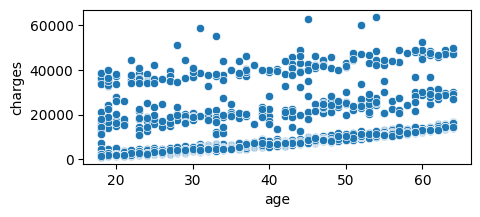

In [14]:
plt.figure(figsize=(5, 2))
sns.scatterplot(data=main_df, x="age", y="charges")

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
train_df, test_df = train_test_split(main_df)

In [22]:
train_df.shape

(1003, 7)

In [23]:
test_df.shape

(335, 7)

In [24]:
X_train = train_df.drop(columns='charges')
y_train = train_df['charges']

In [25]:
#create dummy variables for all of our categorical features (in this case, the STATE name)
X_train_dummies = pd.get_dummies(X_train, drop_first=True)

In [27]:
#instantiate a linear regression model
linreg_model = LinearRegression()

#fit the model to our training data
linreg_model.fit(X_train_dummies, y_train)

#make our first set of predictions (again on the training data)
train_preds = linreg_model.predict(X_train_dummies)

In [29]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [30]:
print(f"Root mean squared error (RMSE): {root_mean_squared_error(y_true = y_train, y_pred=train_preds)}")
print(f"Mean absolute error (MAE): {mean_absolute_error(y_true = y_train, y_pred=train_preds)}")
print(f"R^2 score: {r2_score(y_true = y_train, y_pred=train_preds)}")

Root mean squared error (RMSE): 6107.902905789265
Mean absolute error (MAE): 4155.995817851834
R^2 score: 0.7481309051829794
